In [56]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
from math import pi
import os

In [2]:
def load_all_csv_files(data_dir='data') -> dict:
    dataframes = {}
    
    # Get all CSV files in the directory
    csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
    
    # Read each CSV file
    for csv_file in csv_files:
        file_path = os.path.join(data_dir, csv_file)
        # Use filename without extension as dictionary key
        file_key = csv_file.replace('.csv', '')
        dataframes[file_key] = pd.read_csv(file_path)
        print(f"Loaded {csv_file}: {dataframes[file_key].shape[0]} rows, {dataframes[file_key].shape[1]} columns")
    
    return dataframes

In [71]:
dfs = load_all_csv_files('data')
dfs['Assamese_songs'].head()

Loaded Assamese_songs.csv: 724 rows, 19 columns
Loaded Bengali_songs.csv: 958 rows, 19 columns
Loaded Bhojpuri_songs.csv: 519 rows, 19 columns
Loaded Gujarati_songs.csv: 2115 rows, 19 columns
Loaded Haryanvi_songs.csv: 228 rows, 19 columns
Loaded Hindi_songs.csv: 1184 rows, 19 columns
Loaded Kannada_songs.csv: 3559 rows, 19 columns
Loaded Malayalam_songs.csv: 479 rows, 19 columns
Loaded Marathi_songs.csv: 4699 rows, 19 columns
Loaded Odia_songs.csv: 940 rows, 19 columns
Loaded Old_songs.csv: 2448 rows, 19 columns
Loaded Punjabi_songs.csv: 3818 rows, 19 columns
Loaded Rajasthani_songs.csv: 541 rows, 19 columns
Loaded spotify_data clean.csv: 8582 rows, 15 columns
Loaded Tamil_songs.csv: 4677 rows, 19 columns
Loaded Telugu_songs.csv: 4996 rows, 19 columns
Loaded Urdu_songs.csv: 3116 rows, 19 columns


,song_name,singer,singer_id,duration,language,released_date,danceability,acousticness,energy,liveness,loudness,speechiness,tempo,mode,key,Valence,time_signature,popularity,Stream
0,Namore Kothia,Bhupen Hazarika|Anju Devi,/artist/dr-bhupen-hazarika-2|/artist/anju-devi,07:11,Assamese,02-07-2005,0.77,0.670,0.250,0.471,-7.404,0.0152,149.977,0,9,0.0700,4,40,9195112
1,Jai A Kanu,Khagen Mahanta,/artist/khagen-mahanta,04:41,Assamese,03-09-2005,0.17,0.240,0.557,0.906,-6.357,0.0100,150.031,0,9,0.0454,4,62,5008223
2,Tuamaki Roana,sibcharan das,/artist/sibcharan-das,03:11,Assamese,12-06-2009,0.88,0.628,0.295,0.257,-2.865,0.0100,149.964,0,9,0.0100,4,71,662879
3,Surat Magan Bhayal Rati,Jayanta Hazarika,/artist/jayanta-hazarika,04:02,Assamese,11-04-2015,0.29,0.740,0.288,0.450,-5.943,0.0540,149.962,0,1,0.0310,4,82,9514268
4,Buku Ham Ham Kore,Bhupen Hazarika,/artist/dr-bhupen-hazarika-2,03:23,Assamese,09-11-2019,0.05,0.284,0.692,0.571,-2.519,0.0570,153.945,0,10,0.0129,4,54,1580562


In [74]:
dfs['Assamese_songs'].columns

Index(['song_name', 'singer', 'singer_id', 'duration', 'language',
       'released_date', 'danceability', 'acousticness', 'energy', 'liveness',
       'loudness', 'speechiness', 'tempo', 'mode', 'key', 'Valence',
       'time_signature', 'popularity', 'Stream'],
      dtype='object')

In [70]:
dfs['Assamese_songs'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   song_name       1184 non-null   object 
 1   singer          1184 non-null   object 
 2   singer_id       1184 non-null   object 
 3   duration        1184 non-null   object 
 4   language        1184 non-null   object 
 5   released_date   1184 non-null   object 
 6   danceability    1183 non-null   float64
 7   acousticness    1183 non-null   float64
 8   energy          1183 non-null   float64
 9   liveness        1183 non-null   float64
 10  loudness        1183 non-null   float64
 11  speechiness     1183 non-null   float64
 12  tempo           1183 non-null   float64
 13  mode            1183 non-null   float64
 14  key             1183 non-null   float64
 15  Valence         1183 non-null   float64
 16  time_signature  1183 non-null   float64
 17  popularity      1183 non-null   f

In [80]:
# Top Artists per language
language_dfs = {k: v for k, v in dfs.items() if k not in ['spotify_data clean', 'Old_songs']}
language_dfs = dict(sorted(language_dfs.items()))

In [78]:
# Calculate summary statistics from the dataframes

# Total songs
total_songs = sum(len(df) for df in language_dfs.values())

# Number of unique artists across all language dataframes
all_artists = set()
for df in language_dfs.values():
    if 'singer' in df.columns:
        all_artists.update(df['singer'].dropna().unique())
num_artists = len(all_artists)

# Number of languages
num_languages = len(language_dfs)

# Year range - get min and max release years across all dataframes
all_years = []
for df in language_dfs.values():
    if 'released_date' in df.columns:
        df_temp = df.copy()
        df_temp['released_date'] = pd.to_datetime(df_temp['released_date'], errors='coerce')
        years = df_temp['released_date'].dt.year.dropna()
        all_years.extend(years.tolist())

min_year = int(min(all_years)) if all_years else None
max_year = int(max(all_years)) if all_years else None

# Display the information
print("=" * 60)
print("DATASET SUMMARY")
print("=" * 60)
print(f"Total Songs:        {total_songs:,}")
print(f"Number of Artists:  {num_artists:,}")
print(f"Number of Languages: {num_languages}")
print(f"Year Range:         {min_year} - {max_year}")
print("=" * 60)

DATASET SUMMARY
Total Songs:        33,567
Number of Artists:  5,847
Number of Languages: 15
Year Range:         2000 - 2024


In [75]:
# Get Old_songs dataframe
old_songs_df = dfs['Old_songs']

# Get all language dataframes (excluding Old_songs and spotify_data clean)
language_dfs_check = {k: v for k, v in dfs.items() if k not in ['Old_songs', 'spotify_data clean']}

# Find unique songs in Old_songs that don't exist in other language dataframes
old_songs_set = set(old_songs_df['song_name'].dropna().str.lower())

# Combine all songs from language dataframes
all_language_songs = set()
for df in language_dfs_check.values():
    all_language_songs.update(df['song_name'].dropna().str.lower())

# Find songs in old_songs that are NOT in any language dataframe
unique_to_old = old_songs_df[old_songs_df['song_name'].str.lower().isin(old_songs_set - all_language_songs)]

print(f"Songs in Old_songs not in any language dataframe: {len(unique_to_old)}")
print(f"\nSample of unique songs:")
print(unique_to_old[['song_name', 'singer']].head(10))

# Add these unique songs to Hindi_songs dataframe
if len(unique_to_old) > 0:
    # Create a copy of the unique songs and set language to Hindi
    unique_to_old_copy = unique_to_old.copy()
    unique_to_old_copy['language'] = 'Hindi'
    
    # Append to Hindi_songs dataframe
    dfs['Hindi_songs'] = pd.concat([dfs['Hindi_songs'], unique_to_old_copy], ignore_index=True)
    
    print(f"\n✓ Added {len(unique_to_old)} songs from Old_songs to Hindi_songs")
    print(f"New Hindi_songs shape: {dfs['Hindi_songs'].shape}")
else:
    print("No unique songs found to add.")

Songs in Old_songs not in any language dataframe: 1014

Sample of unique songs:
                                    song_name  \
1184           Tu Kal Chala Jayega - Mohdaziz   
1185                             Rula Ke Gaya   
1189                     Meri Sanson Mein Tum   
1190                        Tumhi Meri Mandir   
1192  Do Lafzon Ki Hai Dil Ki Kahani (Female)   
1193                             Salam Kijiye   
1194            Pal Bhar Mein Yeh Kya Ho Gaya   
1195          Tere Ishq Ka Mujhpe Hua Ye Asar   
1196                   Nainon Mein Darpan Hai   
1197                          Dekh Sakta Hoon   

                                        singer  
1184                             Mohammad Aziz  
1185                           Lata Mangeshkar  
1189                    Asha Bhosle|Kumar Sanu  
1190                           Lata Mangeshkar  
1192                               Asha Bhosle  
1193  Amit Kumar|Bhupinder Singh|Mohammed Rafi  
1194                           Lata M

In [89]:
# Create a combined dataframe with language, popularity, and stream data
combined_data = []

for lang, df in language_dfs.items():
    lang_name = lang.replace('_songs', '')
    temp_df = df[['popularity', 'Stream']].copy()
    temp_df['language'] = lang_name
    combined_data.append(temp_df)

combined_df = pd.concat(combined_data, ignore_index=True)

# Calculate correlation by language
language_stats = combined_df.groupby('language').agg({
    'popularity': ['mean', 'sum'],
    'Stream': ['mean', 'sum']
}).reset_index()

language_stats.columns = ['language', 'avg_popularity', 'total_popularity', 'avg_streams', 'total_streams']
language_stats = language_stats.sort_values('avg_popularity', ascending=False)

print("Language Correlation Summary:")
print("=" * 80)
print(language_stats.to_string(index=False))

Language Correlation Summary:
  language  avg_popularity  total_popularity  avg_streams  total_streams
  Haryanvi       65.798246           15002.0 5.656901e+06   1.289773e+09
      Odia       63.620213           59803.0 5.965740e+06   5.607795e+09
  Assamese       63.441989           45932.0 5.832933e+06   4.223043e+09
  Gujarati       63.169267          133603.0 5.744526e+06   1.214967e+10
     Hindi       63.058261          138539.0 5.632668e+06   1.237497e+10
Rajasthani       62.981516           34073.0 5.586358e+06   3.022220e+09
     Tamil       62.792388          293680.0 5.675207e+06   2.654294e+10
    Telugu       62.756805          313533.0 5.759715e+06   2.877553e+10
   Punjabi       62.700367          239390.0 5.681964e+06   2.169374e+10
 Malayalam       62.630480           30000.0 5.808843e+06   2.782436e+09
   Kannada       62.555774          222636.0 5.736427e+06   2.041594e+10
      Urdu       62.516046          194800.0 5.691465e+06   1.773461e+10
   Marathi       62.1

In [77]:
top_n = 3  # adjust as needed

rows = []
for lang, df in language_dfs.items():
    artist_col = 'singer'
    if 'popularity' not in df.columns:
        raise ValueError(f"'popularity' column not found for {lang}")

    artist_rank = (
        df[[artist_col, 'popularity']]
        .dropna()
        .groupby(artist_col, as_index=False)['popularity']
        .sum()
        .sort_values('popularity', ascending=False)
        .head(top_n)
        .assign(language=lang)
        .rename(columns={artist_col: 'artist'})
    )
    rows.append(artist_rank)

rank_df = pd.concat(rows, ignore_index=True)

# Pivot to wide format for stacked barh
pivot_df = rank_df.pivot(index='language', columns='artist', values='popularity').fillna(0)

# Optional: sort languages by total popularity
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]
pivot_df

artist,Akshaya Mohanty,Anuradha Paudwal,Asha Bhosle,Bhupen Hazarika,Dilraj Kaur,Dwipen Baruah,Ghulam Ali,Hemant Chauhan,K J Yesudas,Kaluram Prajapati,...,Rajesh Madina|Anuja,Rameshwar Pathak,Rehana Mirza,S. Janaki,S. P. Balasubrahmanyam,S. P. Balasubrahmanyam|P. Susheela,Safdarjung Rana|Uma Dubey,Sharda Sinha,T.M. Soundararajan,Usha Mangeshkar
language,,,,,,,,,,,,,,,,,,,,,
Telugu_songs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,33490.0,37764.0,0.0,0.0,0.0,0.0
Tamil_songs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,18340.0,0.0,0.0,0.0,25117.0,0.0
Kannada_songs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,20090.0,20886.0,0.0,0.0,0.0,0.0,0.0
Marathi_songs,0.0,0.0,27774.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13224.0
Hindi_songs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Punjabi_songs,0.0,0.0,6893.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Urdu_songs,0.0,0.0,0.0,0.0,0.0,0.0,6180.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gujarati_songs,0.0,0.0,7019.0,0.0,0.0,0.0,0.0,6336.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Malayalam_songs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11538.0,0.0,...,0.0,0.0,0.0,3894.0,0.0,0.0,0.0,0.0,0.0,0.0


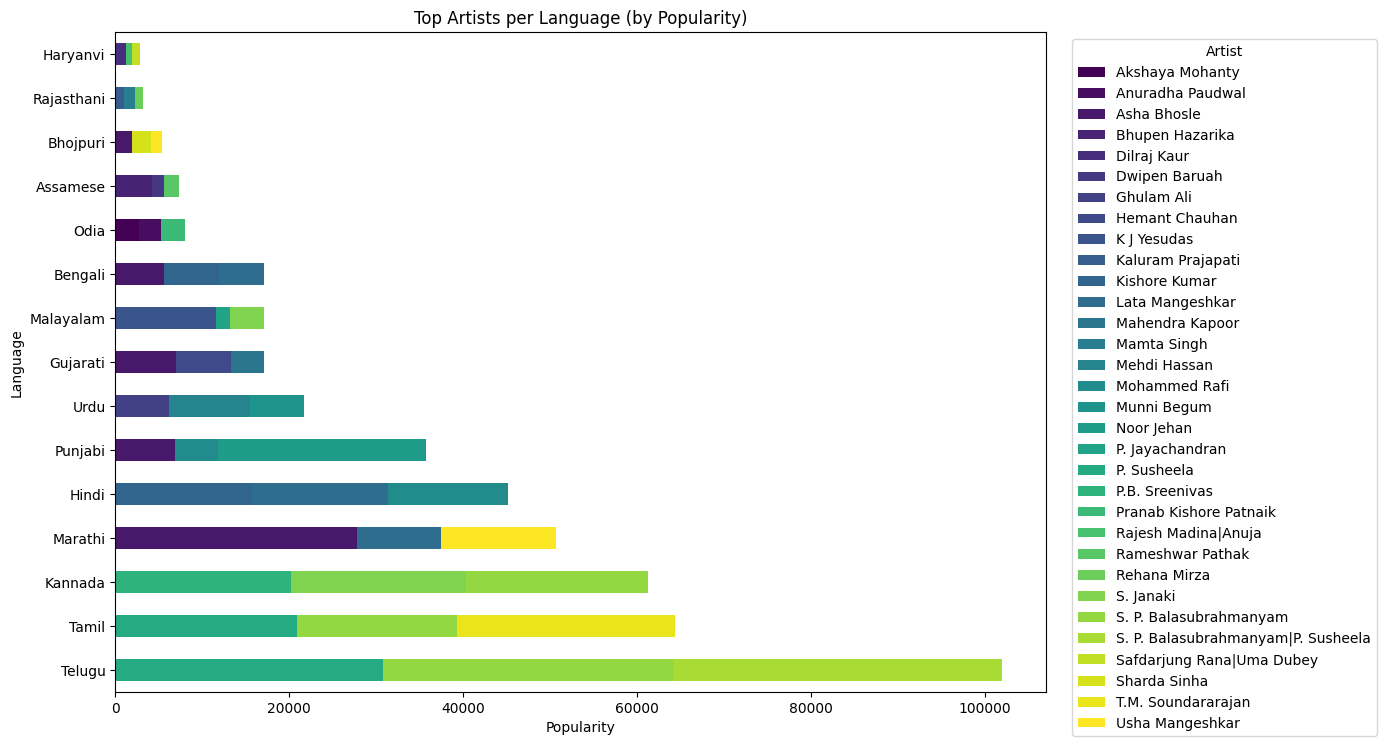

In [51]:
ax = pivot_df.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='viridis')
ax.set_title('Top Artists per Language (by Popularity)')
ax.set_xlabel('Popularity')
ax.set_ylabel('Language')
ax.set_yticklabels([label.replace('_songs', '') for label in pivot_df.index])
ax.legend(title='Artist', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [102]:
language_counts = {}
for lang, df in language_dfs.items():
    lang = lang.replace('_songs', '')
    language_counts[lang] = len(df)

language_counts = dict(sorted(language_counts.items(), key=lambda item: item[1], reverse=False))
language_counts

{'Haryanvi': 228,
 'Malayalam': 479,
 'Bhojpuri': 519,
 'Rajasthani': 541,
 'Assamese': 724,
 'Odia': 940,
 'Bengali': 958,
 'Gujarati': 2115,
 'Hindi': 2198,
 'Urdu': 3116,
 'Kannada': 3559,
 'Punjabi': 3818,
 'Tamil': 4677,
 'Marathi': 4699,
 'Telugu': 4996}

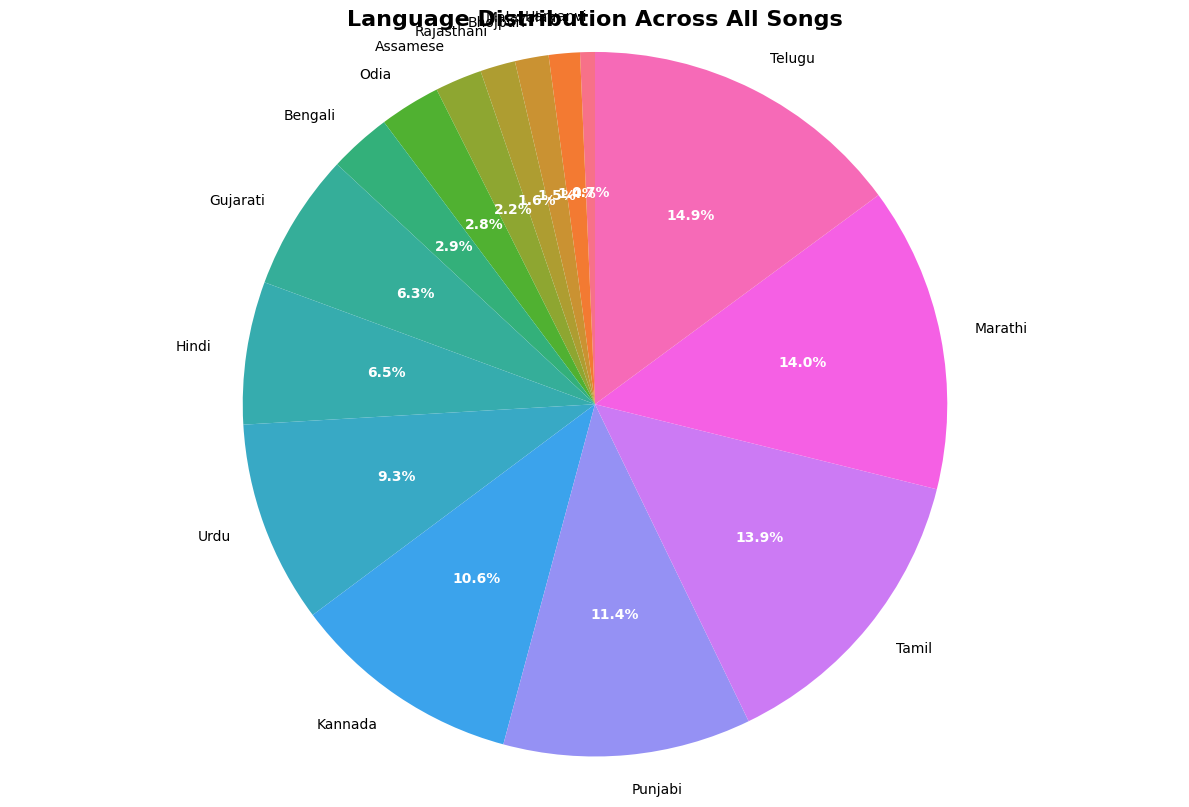

In [103]:
# Create pie chart
plt.figure(figsize=(12, 8))
colors = sns.color_palette('husl', len(language_counts))

wedges, texts, autotexts = plt.pie(
    language_counts.values(), 
    labels=language_counts.keys(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')


plt.title('Language Distribution Across All Songs', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [55]:
print("\nLanguage Distribution Summary:")
print("-" * 50)
total_songs = sum(language_counts.values())
for lang, count in sorted(language_counts.items(), key=lambda x: x[1], reverse=True):
    percentage = (count / total_songs) * 100
    print(f"{lang:15s}: {count:5d} songs ({percentage:5.2f}%)")
print("-" * 50)
print(f"{'Total':15s}: {total_songs:5d} songs")


Language Distribution Summary:
--------------------------------------------------
Telugu         :  4996 songs (14.88%)
Marathi        :  4699 songs (14.00%)
Tamil          :  4677 songs (13.93%)
Punjabi        :  3818 songs (11.37%)
Kannada        :  3559 songs (10.60%)
Urdu           :  3116 songs ( 9.28%)
Hindi          :  2198 songs ( 6.55%)
Gujarati       :  2115 songs ( 6.30%)
Bengali        :   958 songs ( 2.85%)
Odia           :   940 songs ( 2.80%)
Assamese       :   724 songs ( 2.16%)
Rajasthani     :   541 songs ( 1.61%)
Bhojpuri       :   519 songs ( 1.55%)
Malayalam      :   479 songs ( 1.43%)
Haryanvi       :   228 songs ( 0.68%)
--------------------------------------------------
Total          : 33567 songs


## Popularity Trends

C:\Users\Arnav Waghdhare\AppData\Local\Temp\ipykernel_24048\342121136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['year'] = df_clean['released_date'].dt.year
C:\Users\Arnav Waghdhare\AppData\Local\Temp\ipykernel_24048\342121136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['year'] = df_clean['released_date'].dt.year


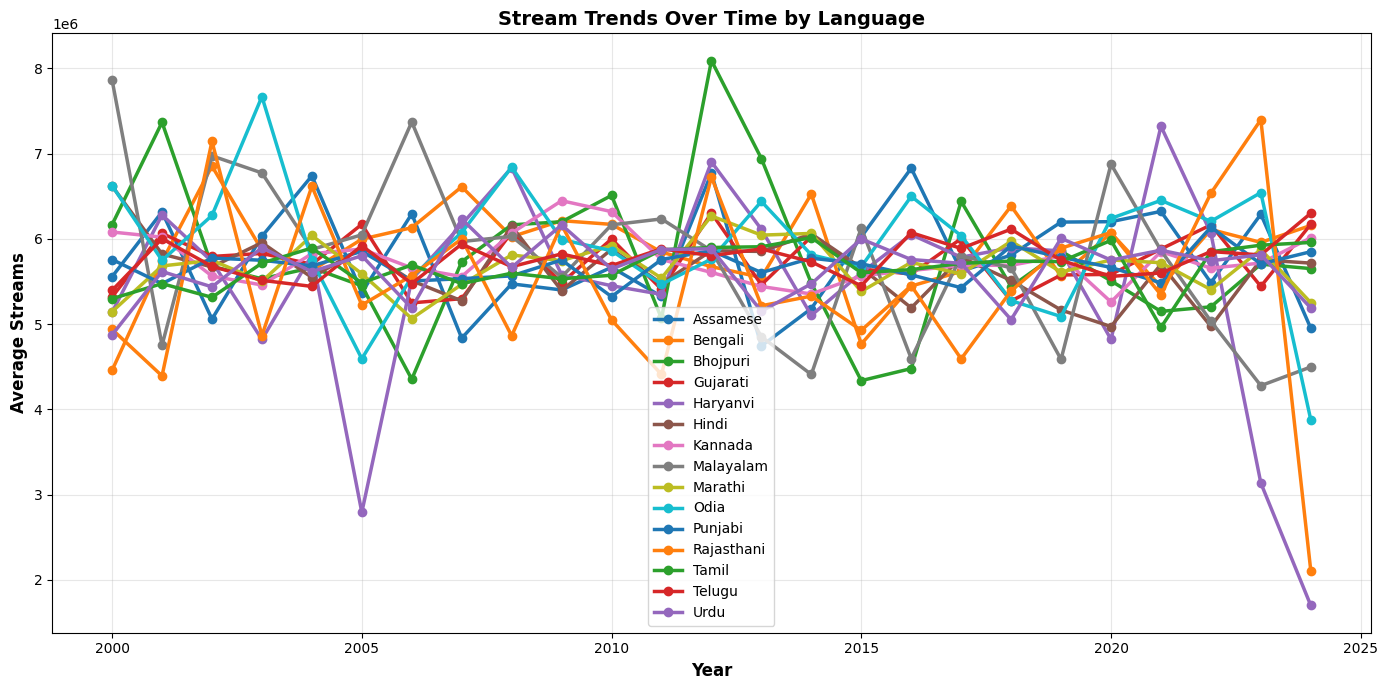

In [86]:
# Convert released_date to datetime and create popularity trend over time
for lang, df in language_dfs.items():
    if lang not in ['Odia', 'Rajasthani', 'Bengali']:
        df['released_date'] = pd.to_datetime(df['released_date'], errors='coerce')

# Create time-based popularity trends
fig, ax = plt.subplots(figsize=(14, 7))

for lang, df in sorted(language_dfs.items()):
    # Group by year and calculate mean popularity
    df_clean = df.dropna(subset=['released_date', 'Stream'])
    df_clean['year'] = df_clean['released_date'].dt.year
    
    yearly_popularity = df_clean.groupby('year', as_index=False)['Stream'].mean()
    
    ax.plot(yearly_popularity['year'], yearly_popularity['Stream'], 
            marker='o', linewidth=2.5, label=lang.replace('_songs', ''), markersize=6)

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Streams', fontsize=12, fontweight='bold')
ax.set_title('Stream Trends Over Time by Language', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [87]:
# Print summary statistics
print("\nStream Trends Summary:")
print("-" * 70)
for lang, df in sorted(language_dfs.items()):
    df_clean = df.dropna(subset=['released_date', 'Stream'])
    df_clean['year'] = df_clean['released_date'].dt.year
    
    if len(df_clean) > 0:
        earliest_year = df_clean['year'].min()
        latest_year = df_clean['year'].max()
        avg_pop = df_clean['Stream'].mean()
        print(f"{lang.replace('_songs', ''):12s}: {earliest_year:.0f}-{latest_year:.0f} | Avg Streams: {avg_pop:.2f}")


Stream Trends Summary:
----------------------------------------------------------------------
Assamese    : 2000-2024 | Avg Streams: 5832932.80
Bengali     : 2000-2024 | Avg Streams: 5880859.25
Bhojpuri    : 2000-2024 | Avg Streams: 5699426.24
Gujarati    : 2000-2024 | Avg Streams: 5744526.32
Haryanvi    : 2000-2024 | Avg Streams: 5656900.57
Hindi       : 2000-2024 | Avg Streams: 5632668.42
Kannada     : 2000-2024 | Avg Streams: 5736426.85
Malayalam   : 2000-2024 | Avg Streams: 5808842.63
Marathi     : 2000-2024 | Avg Streams: 5697216.16
Odia        : 2000-2024 | Avg Streams: 5965739.69
Punjabi     : 2000-2024 | Avg Streams: 5681963.69
Rajasthani  : 2000-2024 | Avg Streams: 5586358.24
Tamil       : 2000-2024 | Avg Streams: 5675207.27
Telugu      : 2000-2024 | Avg Streams: 5759714.77
Urdu        : 2000-2024 | Avg Streams: 5692246.37


C:\Users\Arnav Waghdhare\AppData\Local\Temp\ipykernel_24048\1750316263.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['year'] = df_clean['released_date'].dt.year
C:\Users\Arnav Waghdhare\AppData\Local\Temp\ipykernel_24048\1750316263.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['year'] = df_clean['released_date'].dt.year


Language Correlation Summary:
  language  avg_popularity  total_popularity  avg_streams  total_streams
  Haryanvi       65.798246           15002.0 5.656901e+06   1.289773e+09
      Odia       63.620213           59803.0 5.965740e+06   5.607795e+09
  Assamese       63.441989           45932.0 5.832933e+06   4.223043e+09
  Gujarati       63.169267          133603.0 5.744526e+06   1.214967e+10
     Hindi       63.058261          138539.0 5.632668e+06   1.237497e+10
Rajasthani       62.981516           34073.0 5.586358e+06   3.022220e+09
     Tamil       62.792388          293680.0 5.675207e+06   2.654294e+10
    Telugu       62.756805          313533.0 5.759715e+06   2.877553e+10
   Punjabi       62.700367          239390.0 5.681964e+06   2.169374e+10
 Malayalam       62.630480           30000.0 5.808843e+06   2.782436e+09
   Kannada       62.555774          222636.0 5.736427e+06   2.041594e+10
      Urdu       62.516046          194800.0 5.691465e+06   1.773461e+10
   Marathi       62.1

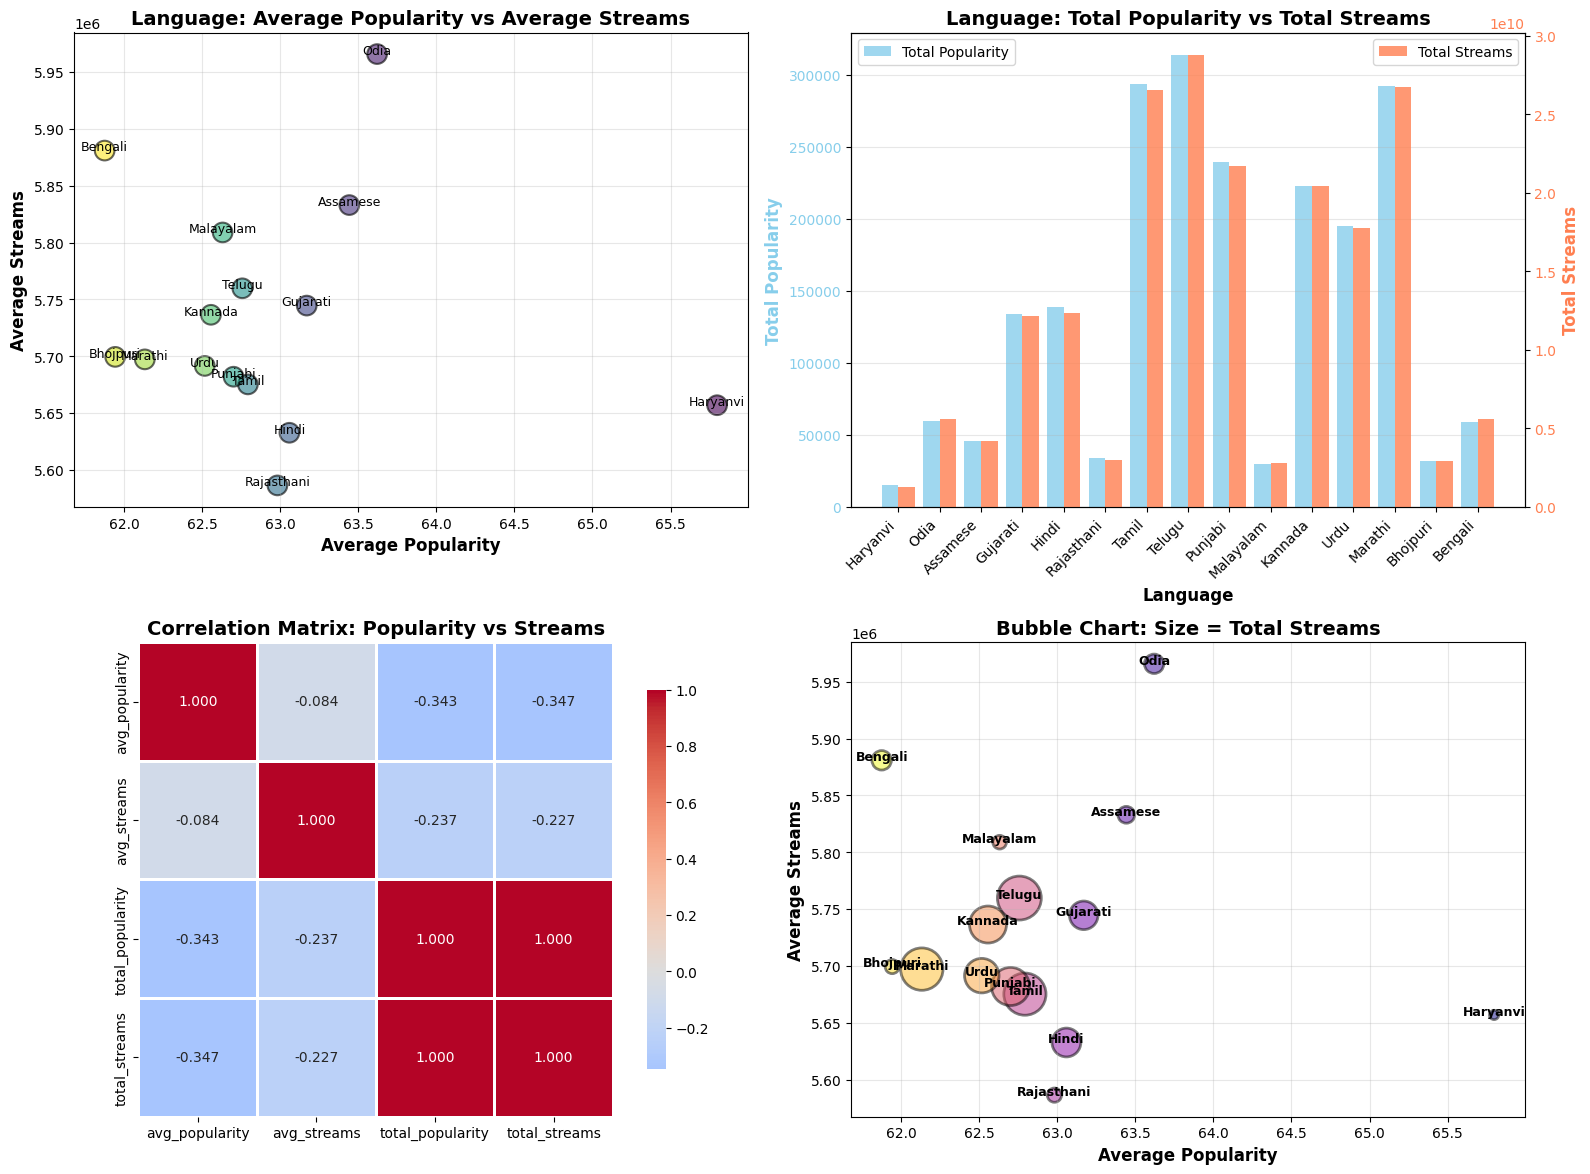

In [95]:
# 1. Scatter plot: Average Popularity vs Average Streams
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Average Popularity vs Average Streams
ax1 = axes[0, 0]
scatter = ax1.scatter(language_stats['avg_popularity'], 
                     language_stats['avg_streams'], 
                     s=200, alpha=0.6, c=range(len(language_stats)), 
                     cmap='viridis', edgecolors='black', linewidth=1.5)

for idx, row in language_stats.iterrows():
    ax1.annotate(row['language'], 
                (row['avg_popularity'], row['avg_streams']),
                fontsize=9, ha='center')

ax1.set_xlabel('Average Popularity', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Streams', fontsize=12, fontweight='bold')
ax1.set_title('Language: Average Popularity vs Average Streams', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Dual axis bar chart - Total Popularity and Total Streams
ax2 = axes[0, 1]
x = range(len(language_stats))
width = 0.4

# Plot bars for total popularity
bars1 = ax2.bar([i - width/2 for i in x], language_stats['total_popularity'], 
                width, label='Total Popularity', alpha=0.8, color='skyblue')

# Create second y-axis for streams
ax2_twin = ax2.twinx()
bars2 = ax2_twin.bar([i + width/2 for i in x], language_stats['total_streams'], 
                     width, label='Total Streams', alpha=0.8, color='coral')

ax2.set_xlabel('Language', fontsize=12, fontweight='bold')
ax2.set_ylabel('Total Popularity', fontsize=12, fontweight='bold', color='skyblue')
ax2_twin.set_ylabel('Total Streams', fontsize=12, fontweight='bold', color='coral')
ax2.set_title('Language: Total Popularity vs Total Streams', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(language_stats['language'], rotation=45, ha='right')
ax2.tick_params(axis='y', labelcolor='skyblue')
ax2_twin.tick_params(axis='y', labelcolor='coral')
ax2.grid(True, alpha=0.3, axis='y')

# Add legends
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# Plot 3: Heatmap of correlation
ax3 = axes[1, 0]
correlation_matrix = language_stats[['avg_popularity', 'avg_streams', 'total_popularity', 'total_streams']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax3)
ax3.set_title('Correlation Matrix: Popularity vs Streams', fontsize=14, fontweight='bold')

# Plot 4: Bubble chart - Size represents total streams
ax4 = axes[1, 1]
bubble_sizes = (language_stats['total_streams'] / language_stats['total_streams'].max()) * 1000

scatter2 = ax4.scatter(language_stats['avg_popularity'], 
                      language_stats['avg_streams'],
                      s=bubble_sizes, alpha=0.5, c=range(len(language_stats)),
                      cmap='plasma', edgecolors='black', linewidth=2)

for idx, row in language_stats.iterrows():
    ax4.annotate(row['language'], 
                (row['avg_popularity'], row['avg_streams']),
                fontsize=9, ha='center', fontweight='bold')

ax4.set_xlabel('Average Popularity', fontsize=12, fontweight='bold')
ax4.set_ylabel('Average Streams', fontsize=12, fontweight='bold')
ax4.set_title('Bubble Chart: Size = Total Streams', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

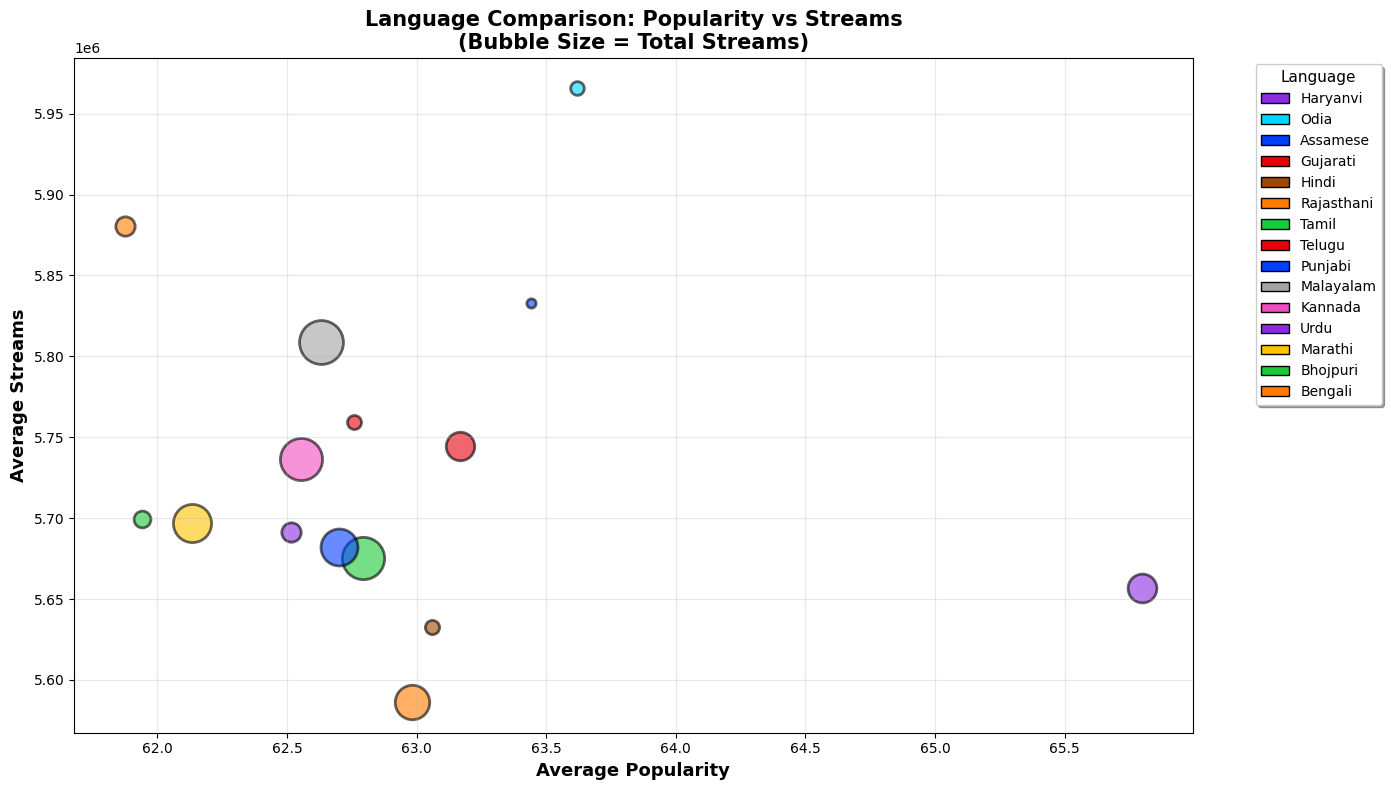

In [99]:
# Bubble chart with legend - Size represents total streams
plt.figure(figsize=(14, 8))

# Use seaborn vibrant color palette
colors = sns.color_palette('bright', len(language_stats))

# Create bubble sizes
bubble_sizes = (language_stats['total_streams'] / language_stats['total_streams'].max()) * 1000

# Create scatter plot with colors
for idx, row in language_stats.iterrows():
    plt.scatter(row['avg_popularity'], 
               row['avg_streams'],
               s=bubble_sizes.iloc[idx], 
               alpha=0.6, 
               color=colors[idx],
               edgecolors='black', 
               linewidth=2)

# Create custom legend with square markers
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[idx], edgecolor='black', label=row['language']) 
                   for idx, row in language_stats.iterrows()]

plt.xlabel('Average Popularity', fontsize=13, fontweight='bold')
plt.ylabel('Average Streams', fontsize=13, fontweight='bold')
plt.title('Language Comparison: Popularity vs Streams\n(Bubble Size = Total Streams)', 
          fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(handles=legend_elements, title='Language', bbox_to_anchor=(1.05, 1), 
           loc='upper left', fontsize=10, title_fontsize=11, frameon=True, shadow=True)
plt.tight_layout()
plt.show()

In [93]:
# Calculate and print correlation coefficients
print("\n" + "=" * 80)
print("CORRELATION COEFFICIENTS")
print("=" * 80)
overall_corr = combined_df[['popularity', 'Stream']].corr()
print(f"\nOverall correlation between Popularity and Streams: {overall_corr.iloc[0, 1]:.4f}")

print("\nPer-Language Correlations:")
print("-" * 80)
for lang, df in sorted(language_dfs.items()):
    lang_name = lang.replace('_songs', '')
    df_clean = df[['popularity', 'Stream']].dropna()
    if len(df_clean) > 1:
        corr = df_clean['popularity'].corr(df_clean['Stream'])
        print(f"{lang_name:15s}: {corr:.4f}")


CORRELATION COEFFICIENTS

Overall correlation between Popularity and Streams: 0.0077

Per-Language Correlations:
--------------------------------------------------------------------------------
Assamese       : 0.0147
Bengali        : 0.0027
Bhojpuri       : -0.0142
Gujarati       : -0.0162
Haryanvi       : 0.0128
Hindi          : -0.0031
Kannada        : 0.0022
Malayalam      : 0.0948
Marathi        : 0.0017
Odia           : 0.0733
Punjabi        : 0.0049
Rajasthani     : -0.0315
Tamil          : 0.0135
Telugu         : 0.0104
Urdu           : 0.0142


## Audio Features

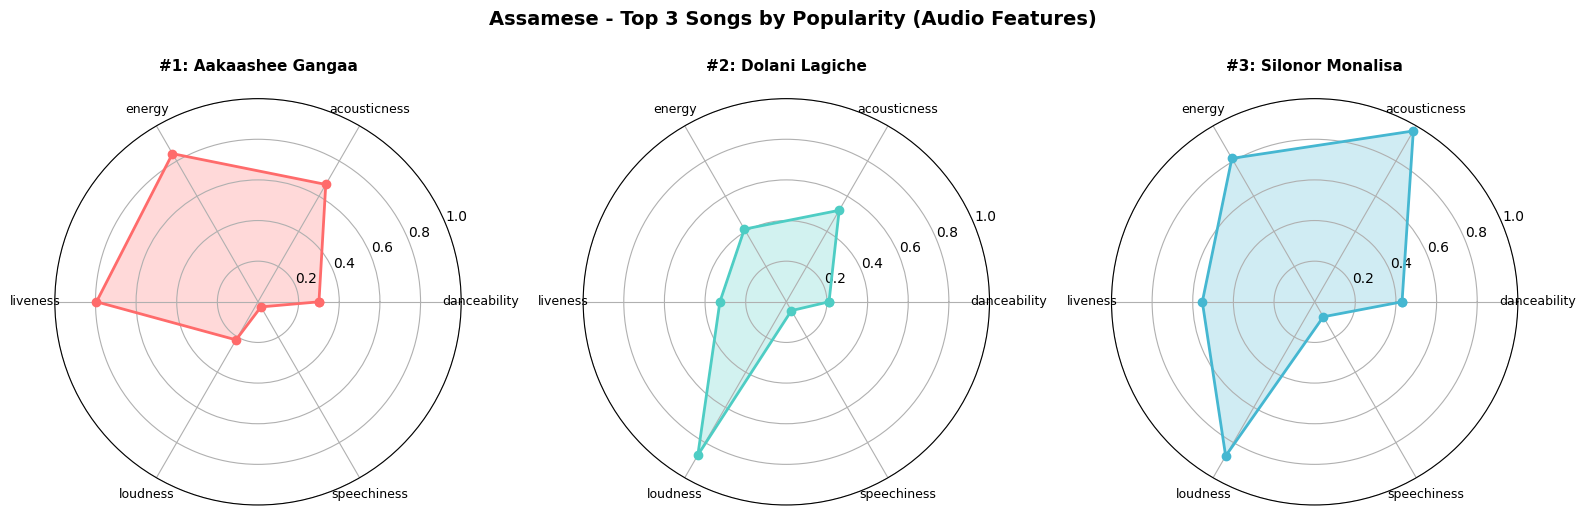


Assamese - Top 3 Songs:
--------------------------------------------------------------------------------
1. Aakaashee Gangaa
   danceability   : 0.300
   acousticness   : 0.667
   energy         : 0.842
   liveness       : 0.795
   loudness       : 0.216
   speechiness    : 0.029
2. Dolani Lagiche
   danceability   : 0.210
   acousticness   : 0.520
   energy         : 0.413
   liveness       : 0.327
   loudness       : 0.871
   speechiness    : 0.050
3. Silonor Monalisa
   danceability   : 0.430
   acousticness   : 0.971
   energy         : 0.815
   liveness       : 0.553
   loudness       : 0.876
   speechiness    : 0.085



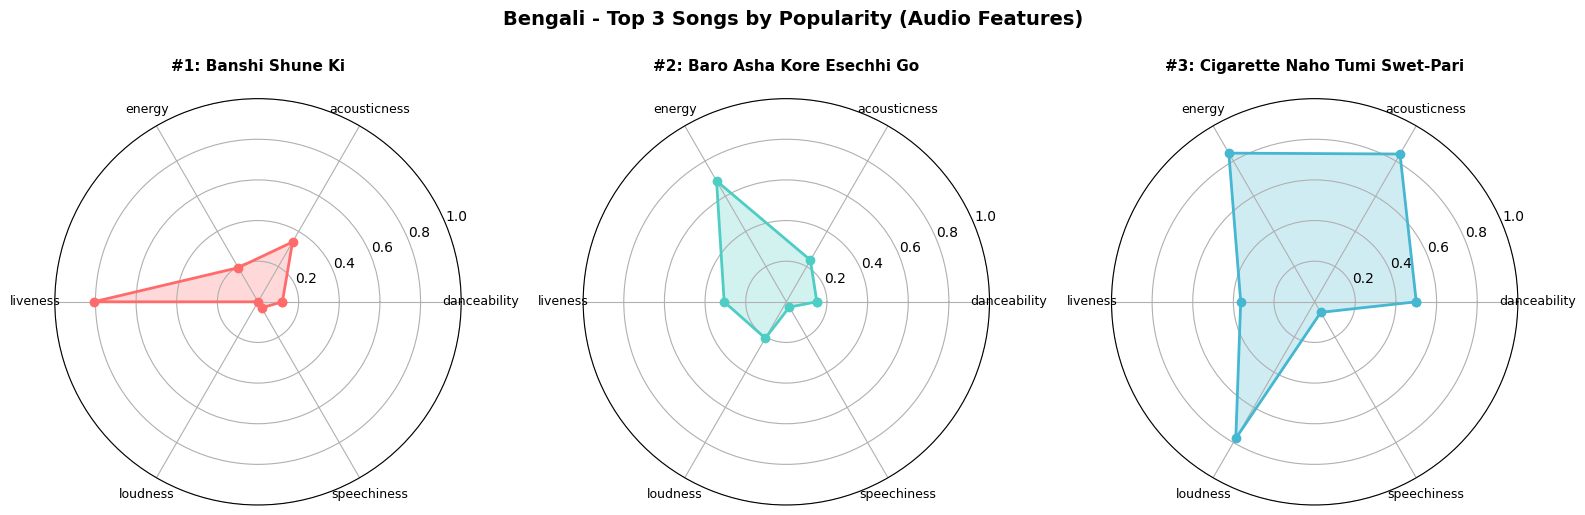


Bengali - Top 3 Songs:
--------------------------------------------------------------------------------
1. Banshi Shune Ki
   danceability   : 0.120
   acousticness   : 0.340
   energy         : 0.194
   liveness       : 0.809
   loudness       : 0.000
   speechiness    : 0.035
2. Baro Asha Kore Esechhi Go
   danceability   : 0.150
   acousticness   : 0.237
   energy         : 0.687
   liveness       : 0.306
   loudness       : 0.207
   speechiness    : 0.030
3. Cigarette Naho Tumi Swet-Pari
   danceability   : 0.500
   acousticness   : 0.840
   energy         : 0.845
   liveness       : 0.364
   loudness       : 0.776
   speechiness    : 0.060



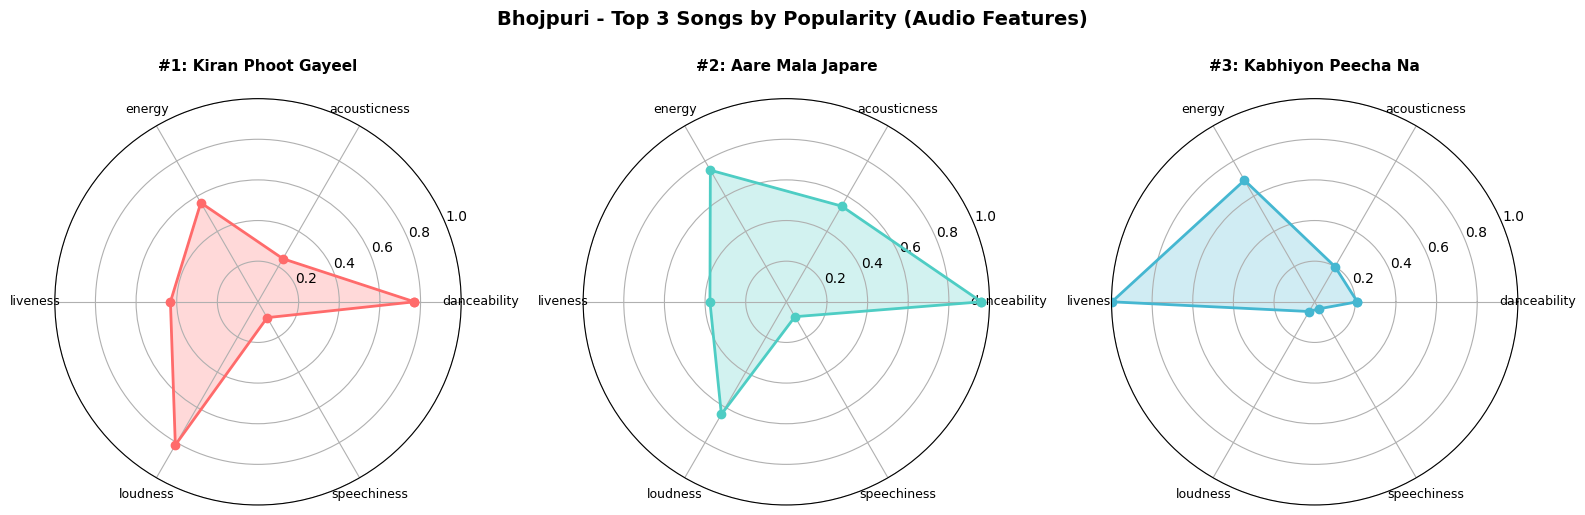


Bhojpuri - Top 3 Songs:
--------------------------------------------------------------------------------
1. Kiran Phoot Gayeel
   danceability   : 0.770
   acousticness   : 0.245
   energy         : 0.563
   liveness       : 0.431
   loudness       : 0.814
   speechiness    : 0.090
2. Aare Mala Japare
   danceability   : 0.960
   acousticness   : 0.544
   energy         : 0.748
   liveness       : 0.376
   loudness       : 0.640
   speechiness    : 0.085
3. Kabhiyon Peecha Na
   danceability   : 0.210
   acousticness   : 0.200
   energy         : 0.691
   liveness       : 0.998
   loudness       : 0.055
   speechiness    : 0.040



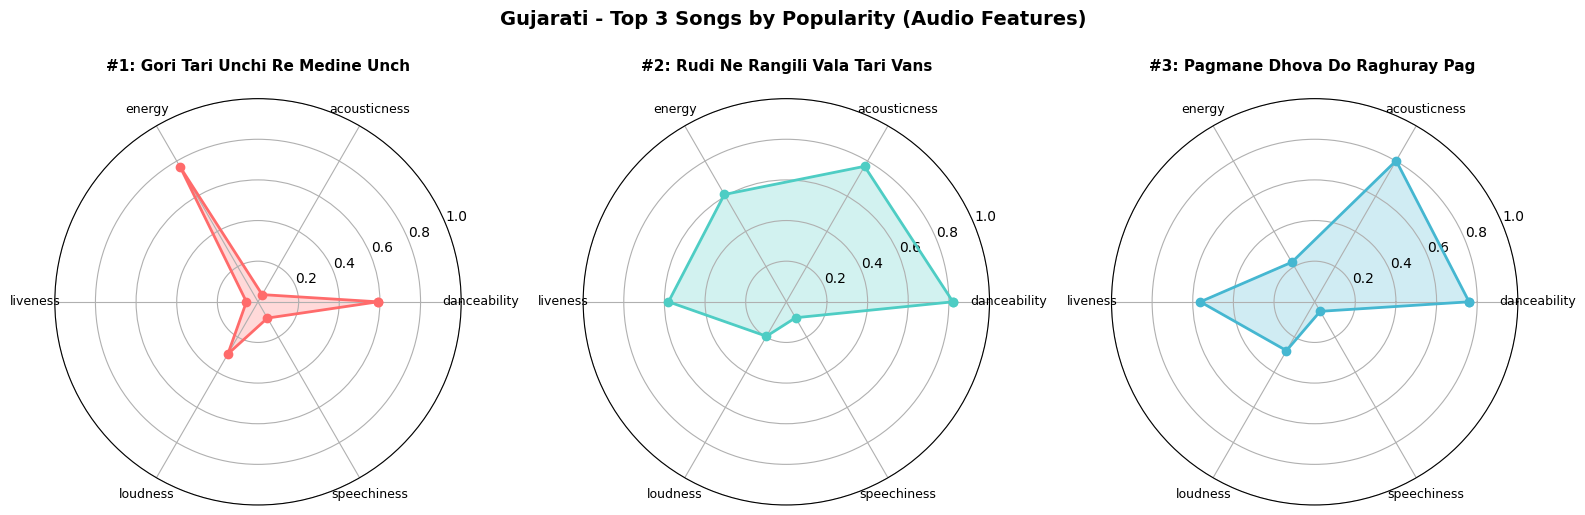


Gujarati - Top 3 Songs:
--------------------------------------------------------------------------------
1. Gori Tari Unchi Re Medine Uncha Mol
   danceability   : 0.590
   acousticness   : 0.041
   energy         : 0.765
   liveness       : 0.057
   loudness       : 0.297
   speechiness    : 0.092
2. Rudi Ne Rangili Vala Tari Vansali
   danceability   : 0.820
   acousticness   : 0.770
   energy         : 0.610
   liveness       : 0.580
   loudness       : 0.196
   speechiness    : 0.090
3. Pagmane Dhova Do Raghuray Pag Mane
   danceability   : 0.760
   acousticness   : 0.802
   energy         : 0.225
   liveness       : 0.563
   loudness       : 0.278
   speechiness    : 0.054



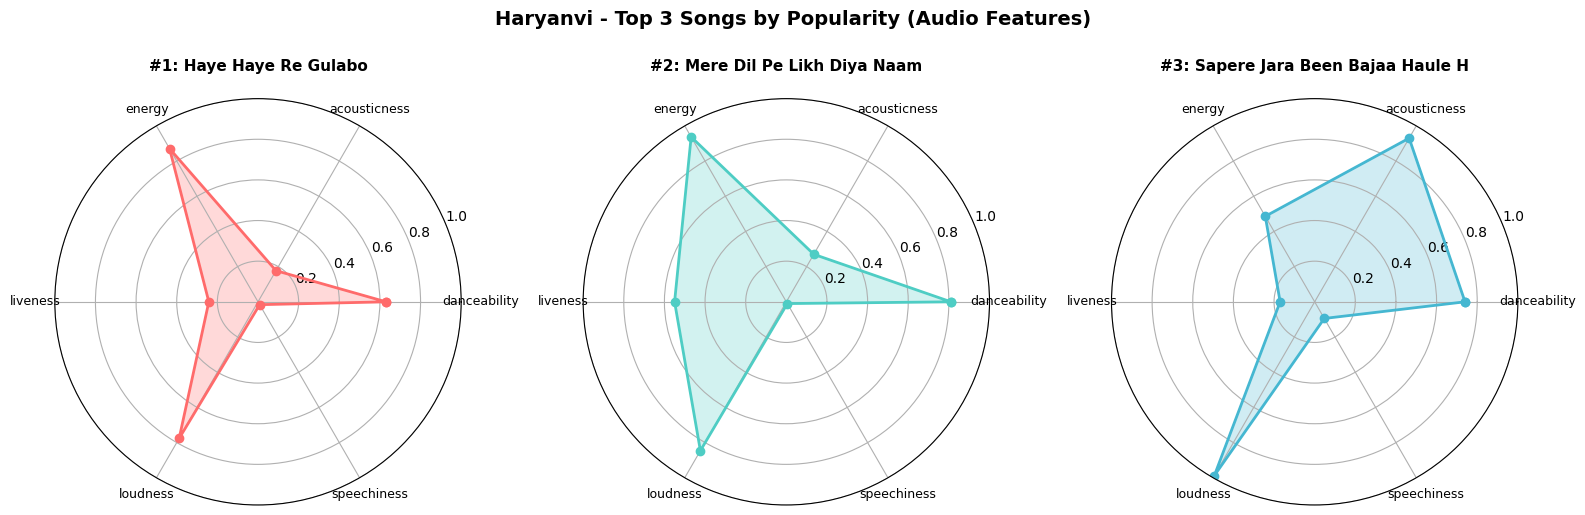


Haryanvi - Top 3 Songs:
--------------------------------------------------------------------------------
1. Haye Haye Re Gulabo
   danceability   : 0.630
   acousticness   : 0.177
   energy         : 0.871
   liveness       : 0.242
   loudness       : 0.776
   speechiness    : 0.016
2. Mere Dil Pe Likh Diya Naam
   danceability   : 0.810
   acousticness   : 0.270
   energy         : 0.937
   liveness       : 0.550
   loudness       : 0.846
   speechiness    : 0.010
3. Sapere Jara Been Bajaa Haule Haule
   danceability   : 0.740
   acousticness   : 0.930
   energy         : 0.486
   liveness       : 0.170
   loudness       : 0.987
   speechiness    : 0.095



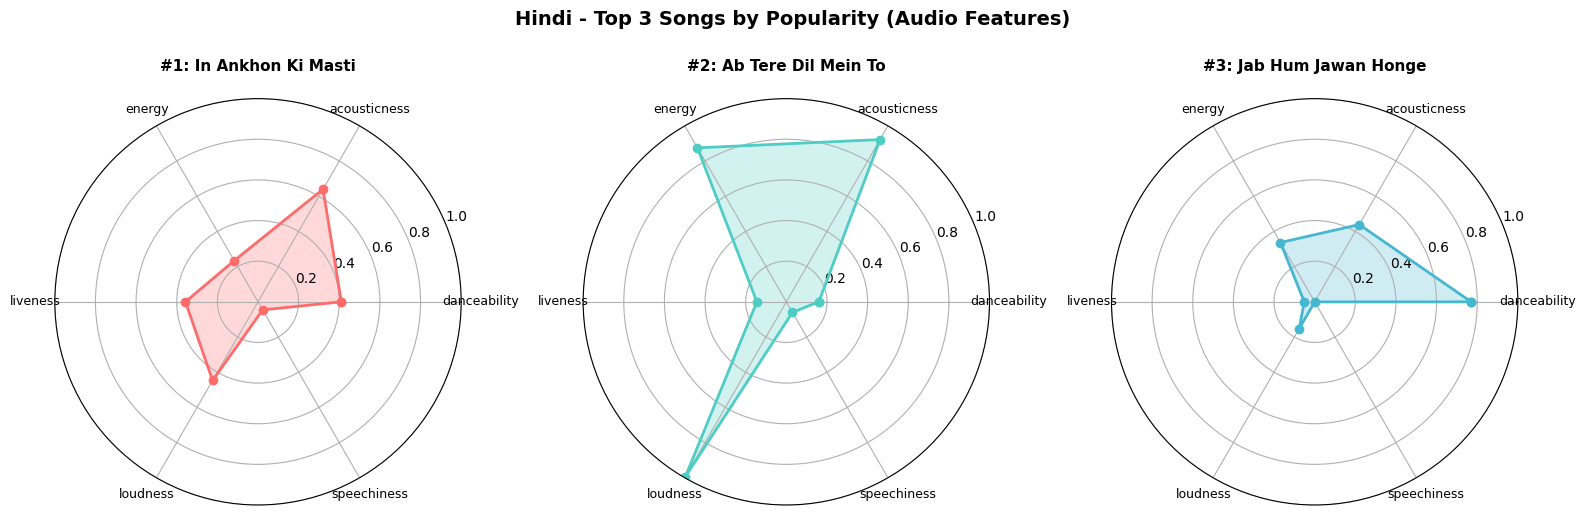


Hindi - Top 3 Songs:
--------------------------------------------------------------------------------
1. In Ankhon Ki Masti
   danceability   : 0.410
   acousticness   : 0.640
   energy         : 0.234
   liveness       : 0.357
   loudness       : 0.447
   speechiness    : 0.046
2. Ab Tere Dil Mein To
   danceability   : 0.160
   acousticness   : 0.922
   energy         : 0.875
   liveness       : 0.145
   loudness       : 0.993
   speechiness    : 0.060
3. Jab Hum Jawan Honge
   danceability   : 0.770
   acousticness   : 0.439
   energy         : 0.337
   liveness       : 0.051
   loudness       : 0.153
   speechiness    : 0.000



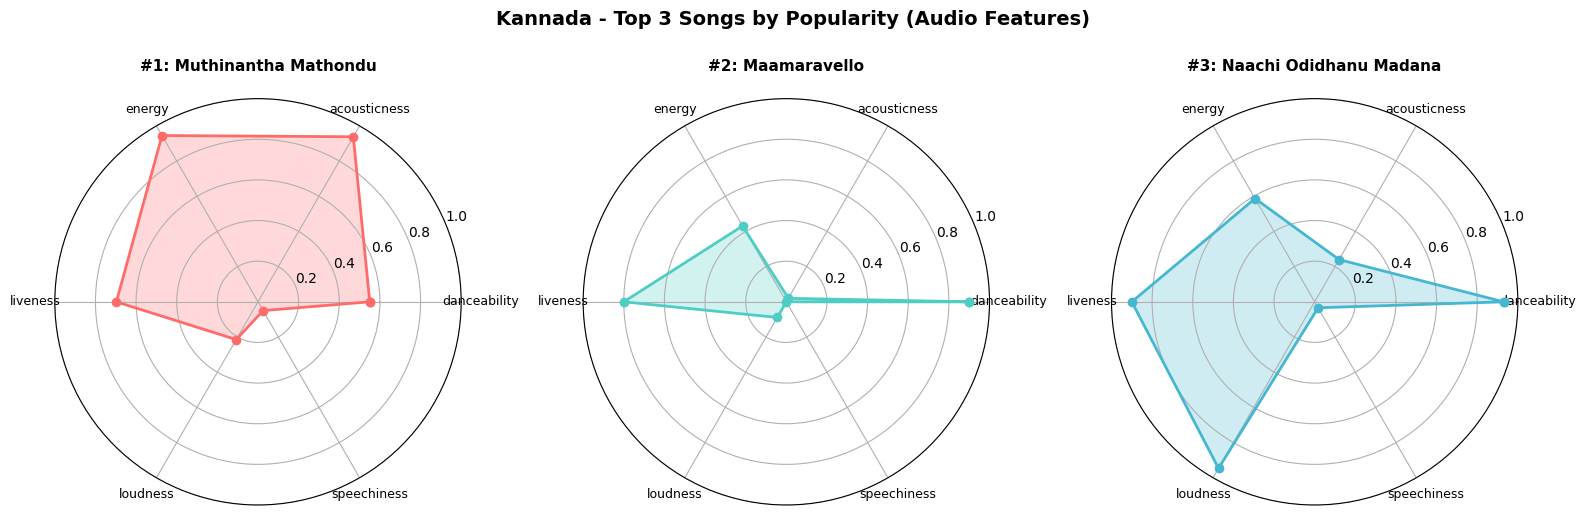


Kannada - Top 3 Songs:
--------------------------------------------------------------------------------
1. Muthinantha Mathondu
   danceability   : 0.550
   acousticness   : 0.938
   energy         : 0.945
   liveness       : 0.697
   loudness       : 0.215
   speechiness    : 0.050
2. Maamaravello
   danceability   : 0.900
   acousticness   : 0.020
   energy         : 0.431
   liveness       : 0.800
   loudness       : 0.089
   speechiness    : 0.000
3. Naachi Odidhanu Madana
   danceability   : 0.930
   acousticness   : 0.240
   energy         : 0.587
   liveness       : 0.900
   loudness       : 0.946
   speechiness    : 0.034



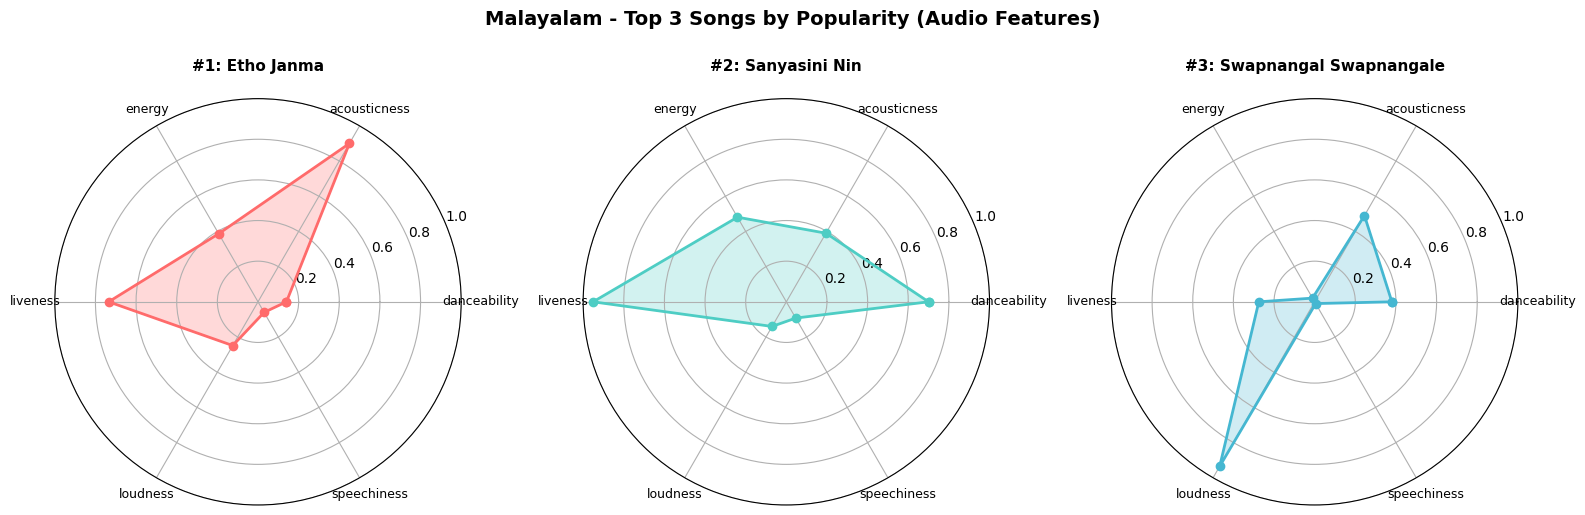


Malayalam - Top 3 Songs:
--------------------------------------------------------------------------------
1. Etho Janma
   danceability   : 0.140
   acousticness   : 0.900
   energy         : 0.387
   liveness       : 0.735
   loudness       : 0.249
   speechiness    : 0.060
2. Sanyasini Nin
   danceability   : 0.700
   acousticness   : 0.390
   energy         : 0.481
   liveness       : 0.951
   loudness       : 0.140
   speechiness    : 0.092
3. Swapnangal Swapnangale
   danceability   : 0.380
   acousticness   : 0.490
   energy         : 0.021
   liveness       : 0.275
   loudness       : 0.935
   speechiness    : 0.010



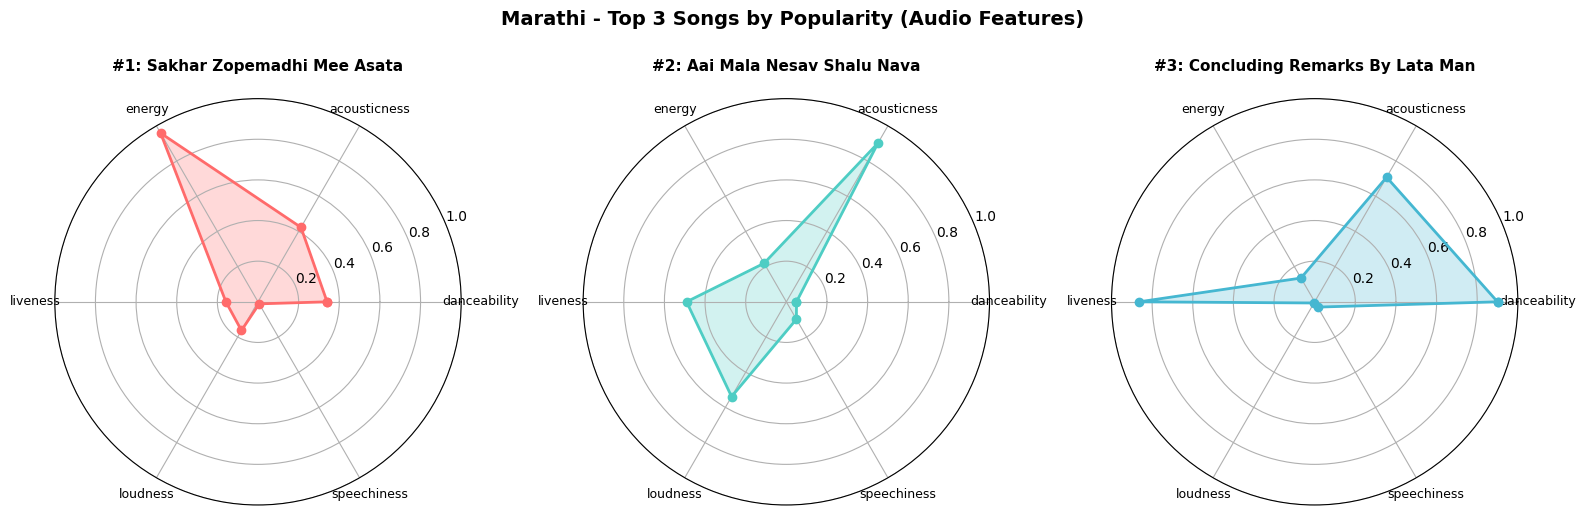


Marathi - Top 3 Songs:
--------------------------------------------------------------------------------
1. Sakhar Zopemadhi Mee Asata
   danceability   : 0.340
   acousticness   : 0.423
   energy         : 0.959
   liveness       : 0.158
   loudness       : 0.163
   speechiness    : 0.012
2. Aai Mala Nesav Shalu Nava
   danceability   : 0.050
   acousticness   : 0.902
   energy         : 0.219
   liveness       : 0.491
   loudness       : 0.539
   speechiness    : 0.099
3. Concluding Remarks By Lata Mangeshkar
   danceability   : 0.900
   acousticness   : 0.708
   energy         : 0.135
   liveness       : 0.864
   loudness       : 0.007
   speechiness    : 0.030



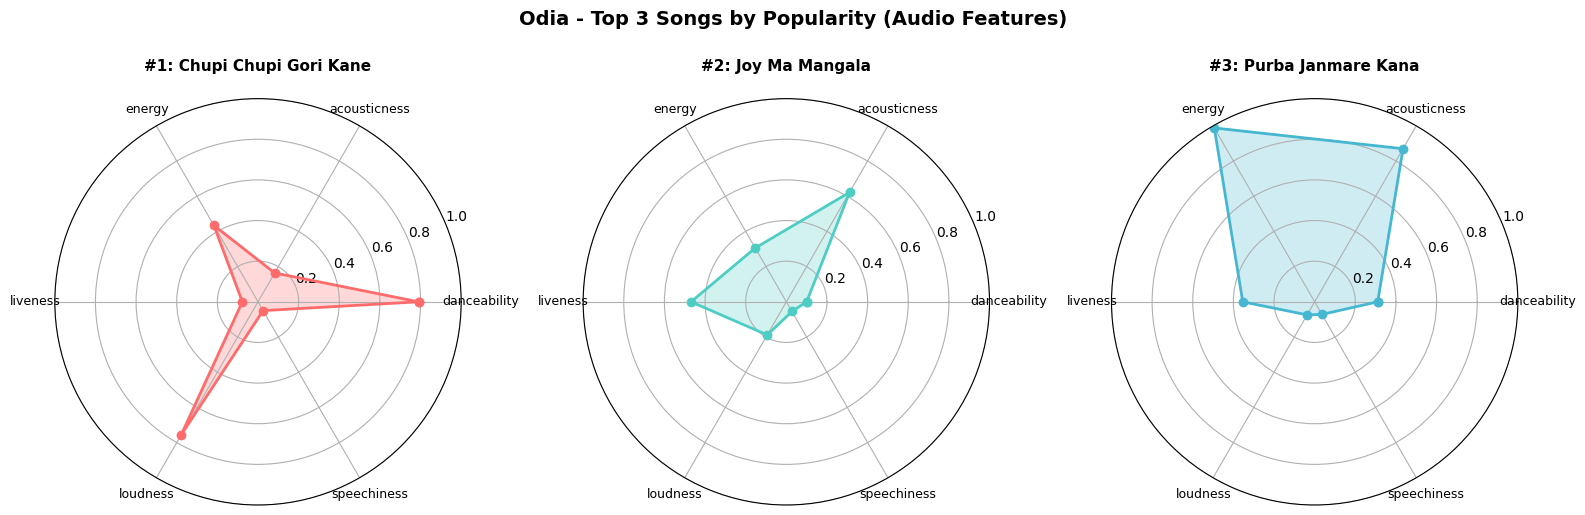


Odia - Top 3 Songs:
--------------------------------------------------------------------------------
1. Chupi Chupi Gori Kane
   danceability   : 0.790
   acousticness   : 0.164
   energy         : 0.434
   liveness       : 0.077
   loudness       : 0.756
   speechiness    : 0.050
2. Joy Ma Mangala
   danceability   : 0.100
   acousticness   : 0.622
   energy         : 0.306
   liveness       : 0.469
   loudness       : 0.188
   speechiness    : 0.055
3. Purba Janmare Kana
   danceability   : 0.310
   acousticness   : 0.870
   energy         : 0.988
   liveness       : 0.354
   loudness       : 0.074
   speechiness    : 0.072



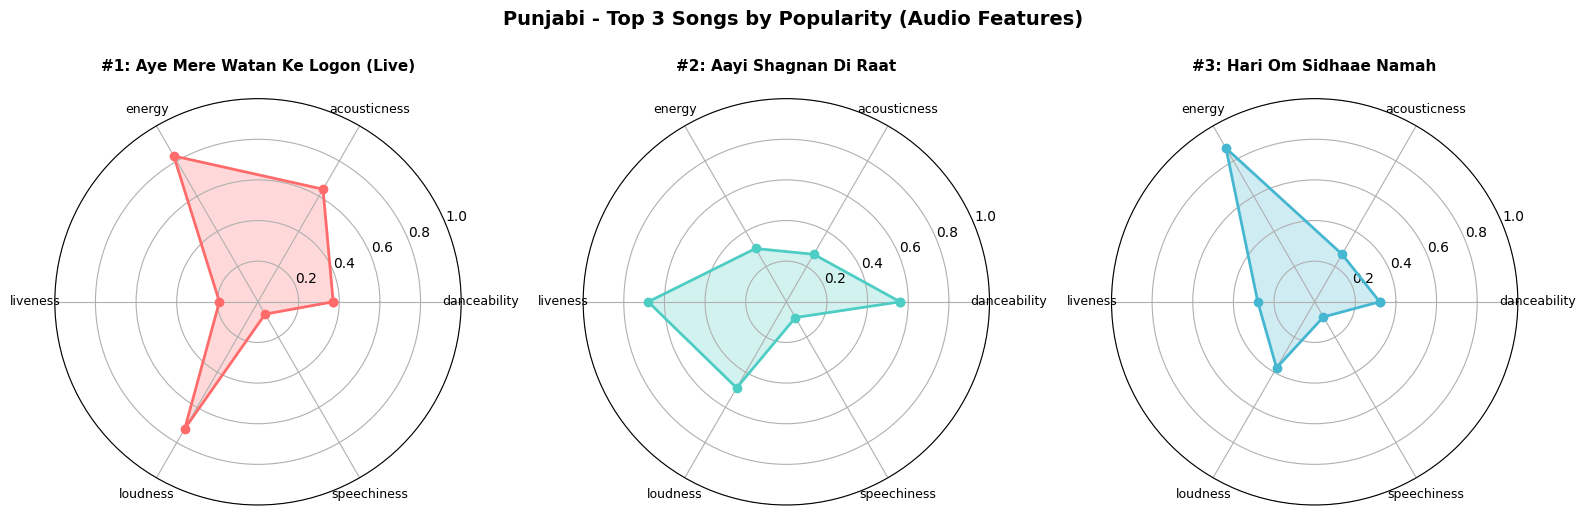


Punjabi - Top 3 Songs:
--------------------------------------------------------------------------------
1. Aye Mere Watan Ke Logon (Live)
   danceability   : 0.370
   acousticness   : 0.640
   energy         : 0.829
   liveness       : 0.190
   loudness       : 0.720
   speechiness    : 0.070
2. Aayi Shagnan Di Raat
   danceability   : 0.560
   acousticness   : 0.270
   energy         : 0.303
   liveness       : 0.680
   loudness       : 0.489
   speechiness    : 0.089
3. Hari Om Sidhaae Namah
   danceability   : 0.320
   acousticness   : 0.270
   energy         : 0.873
   liveness       : 0.280
   loudness       : 0.375
   speechiness    : 0.086



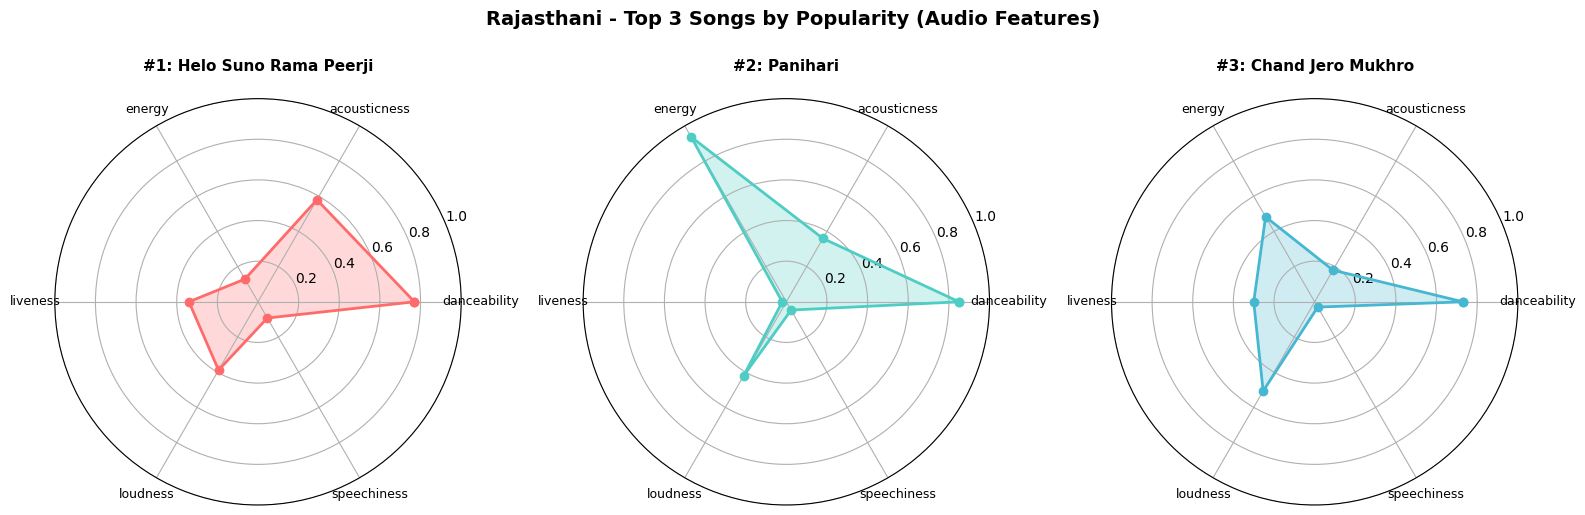


Rajasthani - Top 3 Songs:
--------------------------------------------------------------------------------
1. Helo Suno Rama Peerji
   danceability   : 0.770
   acousticness   : 0.580
   energy         : 0.129
   liveness       : 0.340
   loudness       : 0.388
   speechiness    : 0.092
2. Panihari
   danceability   : 0.850
   acousticness   : 0.360
   energy         : 0.937
   liveness       : 0.020
   loudness       : 0.420
   speechiness    : 0.047
3. Chand Jero Mukhro
   danceability   : 0.730
   acousticness   : 0.180
   energy         : 0.483
   liveness       : 0.300
   loudness       : 0.507
   speechiness    : 0.030



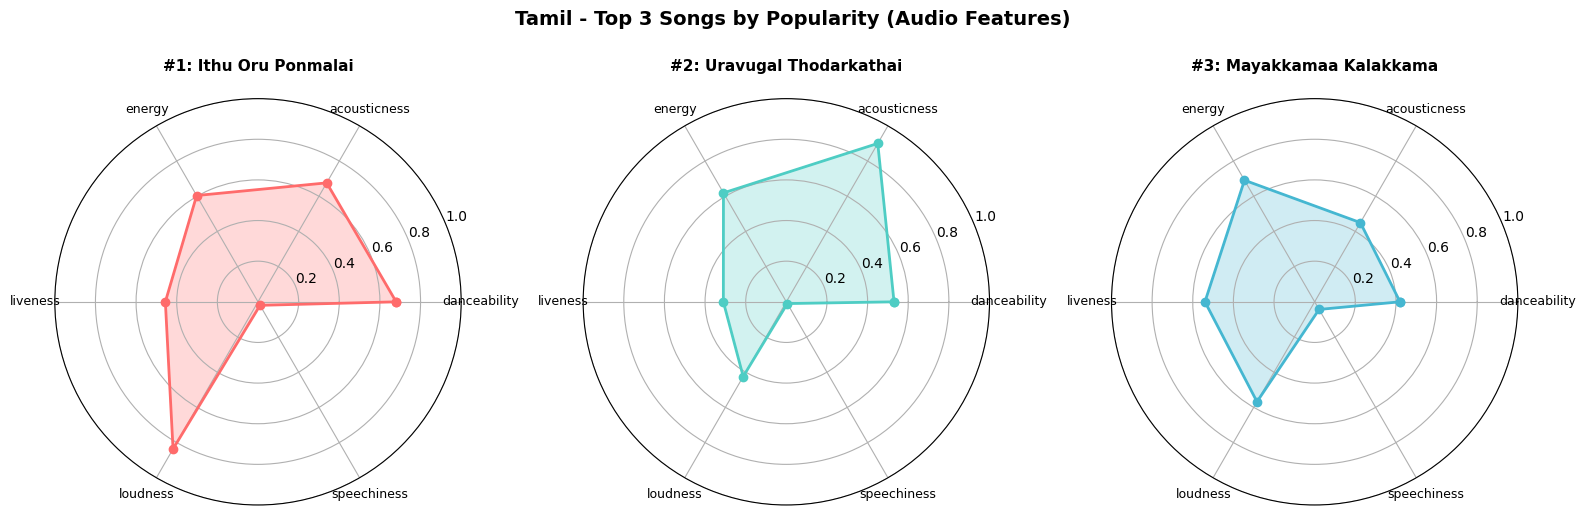


Tamil - Top 3 Songs:
--------------------------------------------------------------------------------
1. Ithu Oru Ponmalai
   danceability   : 0.680
   acousticness   : 0.676
   energy         : 0.604
   liveness       : 0.456
   loudness       : 0.836
   speechiness    : 0.020
2. Uravugal Thodarkathai
   danceability   : 0.530
   acousticness   : 0.900
   energy         : 0.619
   liveness       : 0.310
   loudness       : 0.425
   speechiness    : 0.010
3. Mayakkamaa Kalakkama
   danceability   : 0.420
   acousticness   : 0.450
   energy         : 0.691
   liveness       : 0.540
   loudness       : 0.568
   speechiness    : 0.043



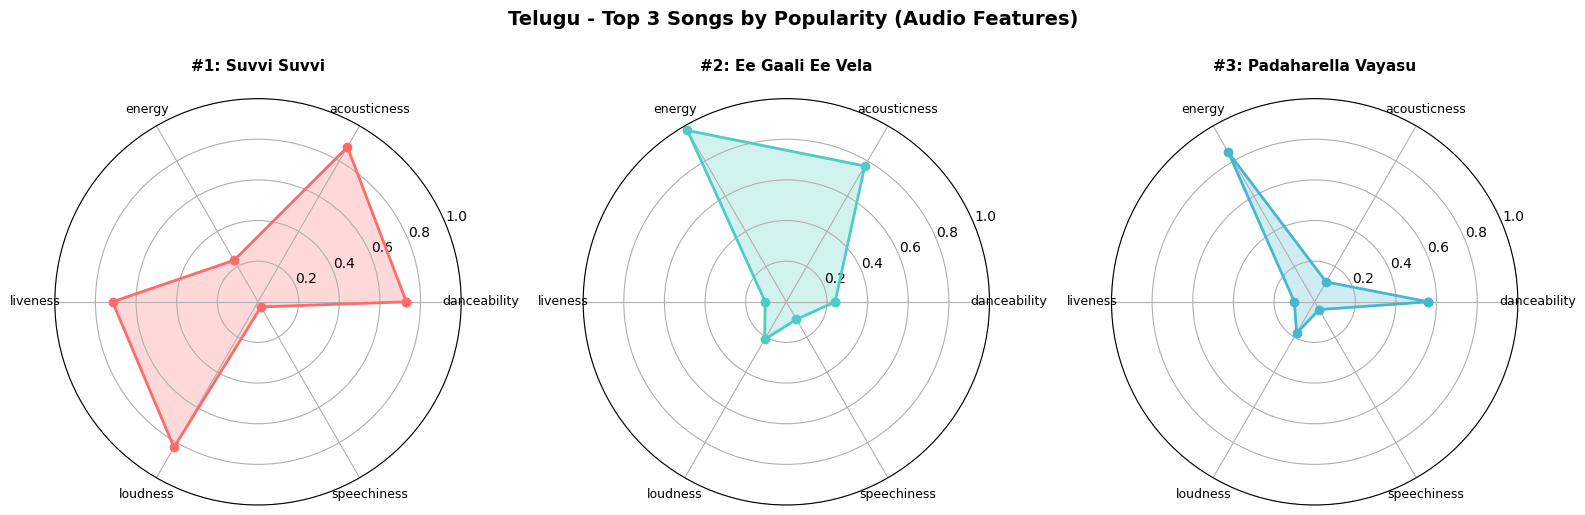


Telugu - Top 3 Songs:
--------------------------------------------------------------------------------
1. Suvvi Suvvi
   danceability   : 0.730
   acousticness   : 0.880
   energy         : 0.236
   liveness       : 0.716
   loudness       : 0.827
   speechiness    : 0.029
2. Ee Gaali Ee Vela
   danceability   : 0.240
   acousticness   : 0.772
   energy         : 0.974
   liveness       : 0.104
   loudness       : 0.213
   speechiness    : 0.100
3. Padaharella Vayasu
   danceability   : 0.560
   acousticness   : 0.113
   energy         : 0.850
   liveness       : 0.100
   loudness       : 0.178
   speechiness    : 0.044



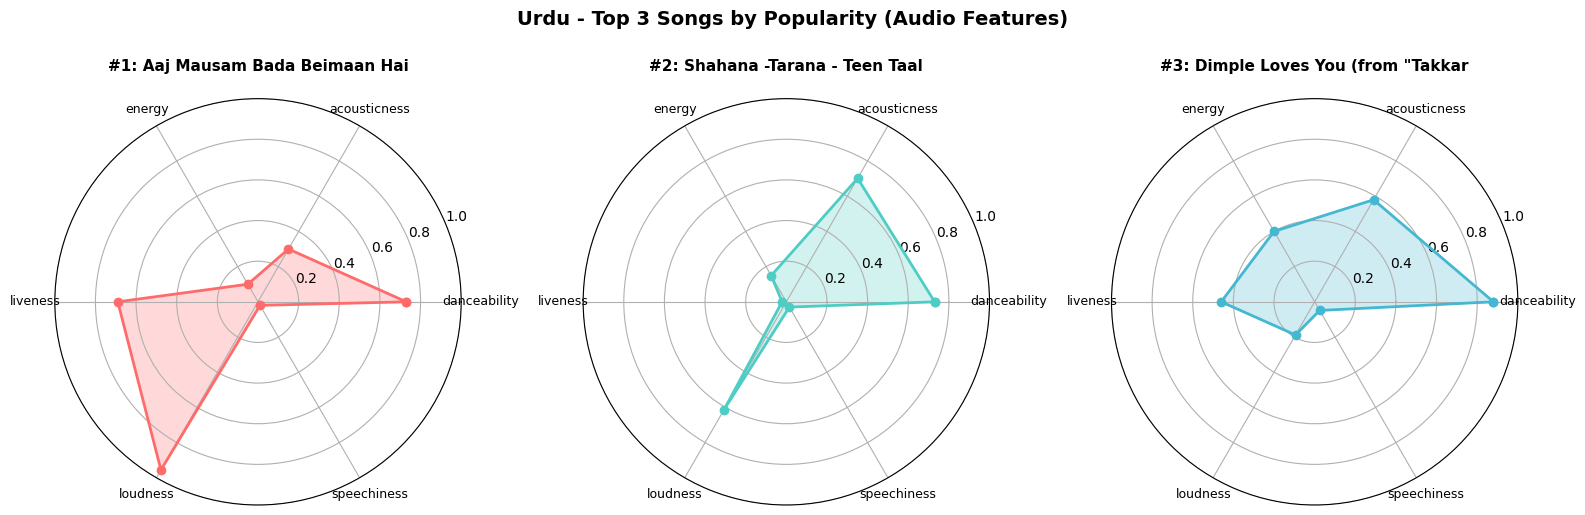


Urdu - Top 3 Songs:
--------------------------------------------------------------------------------
1. Aaj Mausam Bada Beimaan Hai
   danceability   : 0.730
   acousticness   : 0.300
   energy         : 0.100
   liveness       : 0.690
   loudness       : 0.955
   speechiness    : 0.020
2. Shahana -Tarana - Teen Taal
   danceability   : 0.730
   acousticness   : 0.702
   energy         : 0.149
   liveness       : 0.021
   loudness       : 0.613
   speechiness    : 0.030
3. Dimple Loves You (from "Takkaraoo")
   danceability   : 0.880
   acousticness   : 0.580
   energy         : 0.400
   liveness       : 0.460
   loudness       : 0.188
   speechiness    : 0.049



In [59]:
audio_features = ['danceability', 'acousticness', 'energy', 'liveness', 'loudness', 'speechiness']

# Create radar charts for each language
for lang, df in sorted(language_dfs.items()):
    # Sort by popularity (descending) and get top 3
    top_3_songs = df.nlargest(3, 'popularity')[['song_name', *audio_features]].copy()
    
    if len(top_3_songs) == 0:
        print(f"No data for {lang}")
        continue
    
    # Normalize loudness to 0-1 range (as it's typically negative)
    if 'loudness' in top_3_songs.columns:
        loudness_min = df['loudness'].min()
        loudness_max = df['loudness'].max()
        top_3_songs['loudness'] = (top_3_songs['loudness'] - loudness_min) / (loudness_max - loudness_min)
    
    # Create subplots for each song
    fig, axes = plt.subplots(1, 3, figsize=(16, 5), subplot_kw=dict(projection='polar'))
    fig.suptitle(f'{lang.replace("_songs", "")} - Top 3 Songs by Popularity (Audio Features)', 
                 fontsize=14, fontweight='bold', y=1.02)
    
    # Number of variables
    num_vars = len(audio_features)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]  # Complete the circle
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    
    for idx, (ax, (_, song)) in enumerate(zip(axes, top_3_songs.iterrows())):
        # Get values and complete the circle
        values = song[audio_features].tolist()
        values += values[:1]
        
        # Plot
        ax.plot(angles, values, 'o-', linewidth=2, color=colors[idx], label=song['song_name'])
        ax.fill(angles, values, alpha=0.25, color=colors[idx])
        
        # Customize
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(audio_features, size=9)
        ax.set_ylim(0, 1)
        ax.set_title(f"#{idx + 1}: {song['song_name'][:30]}", size=11, fontweight='bold', pad=20)
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n{lang.replace('_songs', '')} - Top 3 Songs:")
    print("-" * 80)
    for idx, (_, song) in enumerate(top_3_songs.iterrows(), 1):
        print(f"{idx}. {song['song_name']}")
        for feature in audio_features:
            print(f"   {feature:15s}: {song[feature]:.3f}")
    print()